In [1]:
%matplotlib inline

from pathlib import Path

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
from skimage import io
from tqdm import tqdm_notebook as tqdm

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [2]:
# Data from https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/multiclass.html#mnist

def load_xy(folder, pbar=True):
    with open(folder / 'data', 'r') as f:
        data = f.readlines()
    if pbar:
        data = tqdm(data)
    
    xs = np.zeros((len(data), 784), dtype=np.float32)
    ys = np.zeros(len(data), dtype=np.int32)
    for i, line in enumerate(data):
        ts = line.split()
        ys[i] = int(ts[0])
        for t in ts[1:]:
            idx = t.find(':')
            xs[i][int(t[:idx]) - 1] = int(t[idx + 1:])
    
    return xs, ys

data = Path('../data/')
x_train, y_train = load_xy(data / 'mnist')
x_val, y_val = load_xy(data / 'mnist.t')

HBox(children=(IntProgress(value=0, max=60000), HTML(value='')))

HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))

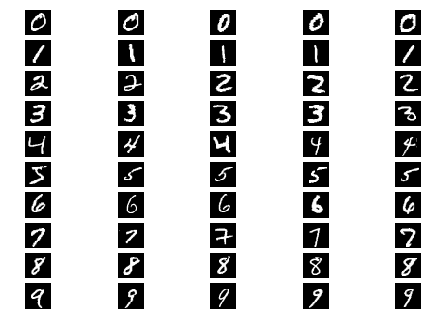

In [44]:
fig, axes = plt.subplots(nrows=10, ncols=5)
xs, ys = x_train[:80], y_train[:80]
for y in range(10):
    imgs = xs[ys == y]
    for i in range(min(len(imgs), 5)):
        axes[y, i].imshow(imgs[i].reshape(28, 28), cmap='gray')
        axes[y, i].axis('off')
plt.show()

In [39]:
%%time

pca = PCA(n_components=20)
pca.fit(x_train)
print(pca.explained_variance_ratio_.cumsum())
xt, yt = pca.transform(x_train), y_train
xv, yv = pca.transform(x_val), y_val

svc = SVC(C=1.0, kernel='poly', verbose=True)
svc.fit(xt, yt)
print(svc.score(xv, yv))

[ 0.09704792  0.16800824  0.22970006  0.283595    0.33228365  0.37540656
  0.40812632  0.43696573  0.46458641  0.48815677  0.50924897  0.52947921
  0.54663759  0.56355894  0.57934558  0.59417528  0.60742033  0.62018842
  0.63205975  0.64358556]
[LibSVM]0.9699
CPU times: user 31.4 s, sys: 9.8 s, total: 41.3 s
Wall time: 31 s


In [13]:
%%time
rf = RandomForestClassifier(n_estimators=20)
rf.fit(x_train, y_train)
print(rf.score(x_val, y_val))

0.9607
CPU times: user 10 s, sys: 1.02 ms, total: 10 s
Wall time: 10 s
